In [1]:
import pandas as pd
import numpy as np

In [1251]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install selenium

In [3]:
!pip install webdriver-manager

### Iniciando o processo de weebscrapping do site da XP

In [4]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By

In [5]:
service = Service()

options = webdriver.ChromeOptions()

driver = webdriver.Chrome(service=service, options=options)

In [6]:
url = 'https://www.xpi.com.br/investimentos/fundos-de-investimento/lista/#/'

driver.get(url)

In [9]:
xpath_vermais = '//*[@id="__next"]/arsenal-loader/div/div/div[2]/div'

In [10]:
import time
time.sleep(1)
driver.find_element(By.XPATH, xpath_vermais).click()

In [12]:
texto_dados = driver.find_element(By.CLASS_NAME, 'sc-esOvli').text

In [1327]:
texto_dados

'Bahia AM Maraú Advisory FIC FIM\nMultimercado\n5.000\n1,90\nD+30\n(Dias Corridos)\nD+1\n(Dias Úteis)\n13\n0,08\n1,75\n5,65\n17,14\n28,05\nINVESTIR\nSelection Multimercado Plus FIC...\nMultimercado\n100\n0,85\nD+30\n(Dias Corridos)\nD+2\n(Dias Úteis)\n13\n-2,31\n-1,82\n5,62\n13,06\n21,24\nINVESTIR\nMoat Capital Equity Hedge FIC FI...\nMultimercado\n1.000\n1,85\nD+30\n(Dias Corridos)\nD+1\n(Dias Úteis)\n13\n0,24\n-0,80\n7,51\n20,08\n36,06\nKiron FIC FIA\nRenda Variável\n1.000\n1,80\nD+30\n(Dias Corridos)\nD+2\n(Dias Úteis)\n29\n0,87\n-2,15\n21,43\n11,15\n-13,46\nINVESTIR\nXP Macro Institucional FIC FIM\nMultimercado\n5.000\n1,25\nD+0\n(Dias Corridos)\nD+1\n(Dias Úteis)\n13\n0,03\n0,55\n6,06\n16,65\n25,65\nINVESTIR\nGiant Darius FIC FIM\nMultimercado\n500\n2,00\nD+30\n(Dias Corridos)\nD+3\n(Dias Úteis)\n13\n-0,58\n2,22\n7,53\n12,48\n26,99\nSelection RF High Yield FIC FIM...\nRenda Fixa Pós-Fixado\n100\n0,50\nD+90\n(Dias Corridos)\nD+3\n(Dias Úteis)\n13\n0,98\n3,96\n13,51\n29,98\n42,44\nI

### Extraindo os dados da Kinea utilizando Regex

In [22]:
import re
padrao_kinea = re.compile(r'(Kinea.*?)INVESTIR', re.DOTALL)
ocorrencias_kinea = padrao_kinea.findall(texto_dados)
ocorrencias_kinea

['Kinea Chronos FIM\nMultimercado\n5.000\n2,00\nD+5\n(Dias Úteis)\nD+1\n(Dias Úteis)\n13\n0,26\n1,38\n11,11\n22,82\n33,59\n',
 'Kinea RF Absoluto FI LP\nRenda Fixa Pré-Fixado/Inflação\n5.000\n0,80\nD+0\n(Dias Úteis)\nD+1\n(Dias Úteis)\n11\n0,14\n2,74\n12,62\n28,13\n37,44\n',
 'Kinea Atlas II FIM\nMultimercado\n1.000\n2,00\nD+29\n(Dias Corridos)\nD+1\n(Dias Úteis)\n13\n0,42\n0,38\n11,53\n22,64\n35,75\n',
 'Kinea IPCA Dinâmico II Advisory...\nRenda Fixa Pré-Fixado/Inflação\n500\n0,92\nD+0\n(Dias Úteis)\nD+1\n(Dias Úteis)\n11\n0,33\n1,20\n12,63\n26,35\n41,53\n',
 'Kinea PE V Feeder Advisory FIP M...\nAlternativo\n25.000\n1,85\n50\n-0,03\n6,32\n11,26\n-19,96\nN/D\nM Global BDR Advisory FIC FIA BD...\nInternacional\n100\n1,00\nD+1\n(Dias Úteis)\nD+3\n(Dias Úteis)\n26\n0,84\n19,00\n36,62\n41,85\nN/D\n',
 'Kinea Gama FIC FIA\nRenda Variável\n1.000\n2,00\nD+15\n(Dias Úteis)\nD+2\n(Dias Úteis)\n26\n0,79\n-6,18\n22,44\n12,05\n2,65\n',
 'Kinea Oportunidade FIRF CP\nRenda Fixa Pós-Fixado\n1.000\n0

In [234]:
i = 0
lista_infos = []
for i in range(len(ocorrencias)):
        item = ocorrencias[i].split('\n')
        lista_infos.append(item)
        i += 1

In [235]:
i = 0
lista_final = []
for item in lista_infos:
    lista_final.append(lista_infos[i][0:14])
    i += 1

In [67]:
lista_final[4] = lista_final[4][0:10]

In [69]:
colunas = ['nome_do_fundo', 'tipo','aplicacao_inicial', 'taxa_adm','data_cotizacao',
           'data_liquidacao','risco','rentabilidade_mes','rentabilidade_ano',
           'rentabilidade_12_meses','rentabilidade_24_meses',
           'rentabilidade_36_meses']

In [70]:
lista4 = lista_final.pop(4)

In [71]:
for fundo in lista_final:
    del fundo[5]
    del fundo[6]

In [78]:
df_kinea_incompleto = pd.DataFrame(lista_final, columns=colunas)

In [79]:
df_kinea_incompleto

,nome_do_fundo,tipo,aplicacao_inicial,taxa_adm,data_cotizacao,data_liquidacao,risco,rentabilidade_mes,rentabilidade_ano,rentabilidade_12_meses,rentabilidade_24_meses,rentabilidade_36_meses
0,Kinea Chronos FIM,Multimercado,5.000,"2,00",D+5,D+1,13,"0,26","1,38","11,11","22,82","33,59"
1,Kinea RF Absoluto FI LP,Renda Fixa Pré-Fixado/Inflação,5.000,"0,80",D+0,D+1,11,"0,14","2,74","12,62","28,13","37,44"
2,Kinea Atlas II FIM,Multimercado,1.000,"2,00",D+29,D+1,13,"0,42","0,38","11,53","22,64","35,75"
3,Kinea IPCA Dinâmico II Advisory...,Renda Fixa Pré-Fixado/Inflação,500,"0,92",D+0,D+1,11,"0,33","1,20","12,63","26,35","41,53"
4,Kinea Gama FIC FIA,Renda Variável,1.000,"2,00",D+15,D+2,26,"0,79","-6,18","22,44","12,05","2,65"
5,Kinea Oportunidade FIRF CP,Renda Fixa Pós-Fixado,1.000,"0,80",D+90,D+1,11,"0,05","4,48","15,51","32,22","44,22"
6,Kinea Dakar RF FIC FI LP,Renda Fixa Pós-Fixado,1.000,"0,90",D+0,D+1,11,"0,33","1,43","13,84",N/D,N/D


In [80]:
nova_linha = pd.DataFrame({'nome_do_fundo':lista4[0], 'tipo':lista4[1],
         'aplicacao_inicial':lista4[2], 'taxa_adm':lista4[3],
         'data_cotizacao':'NaN', 'data_liquidacao':'NaN',
         'risco':lista4[4], 'rentabilidade_mes':lista4[5],
         'rentabilidade_ano':lista4[6],'rentabilidade_12_meses':lista4[7],
         'rentabilidade_24_meses':lista4[8], 'rentabilidade_36_meses':lista4[9]}, index=[0])

In [81]:
df_kinea = pd.concat([df_kinea_incompleto, nova_linha], ignore_index=True)

In [82]:
df_kinea

,nome_do_fundo,tipo,aplicacao_inicial,taxa_adm,data_cotizacao,data_liquidacao,risco,rentabilidade_mes,rentabilidade_ano,rentabilidade_12_meses,rentabilidade_24_meses,rentabilidade_36_meses
0,Kinea Chronos FIM,Multimercado,5.000,"2,00",D+5,D+1,13,"0,26","1,38","11,11","22,82","33,59"
1,Kinea RF Absoluto FI LP,Renda Fixa Pré-Fixado/Inflação,5.000,"0,80",D+0,D+1,11,"0,14","2,74","12,62","28,13","37,44"
2,Kinea Atlas II FIM,Multimercado,1.000,"2,00",D+29,D+1,13,"0,42","0,38","11,53","22,64","35,75"
3,Kinea IPCA Dinâmico II Advisory...,Renda Fixa Pré-Fixado/Inflação,500,"0,92",D+0,D+1,11,"0,33","1,20","12,63","26,35","41,53"
4,Kinea Gama FIC FIA,Renda Variável,1.000,"2,00",D+15,D+2,26,"0,79","-6,18","22,44","12,05","2,65"
5,Kinea Oportunidade FIRF CP,Renda Fixa Pós-Fixado,1.000,"0,80",D+90,D+1,11,"0,05","4,48","15,51","32,22","44,22"
6,Kinea Dakar RF FIC FI LP,Renda Fixa Pós-Fixado,1.000,"0,90",D+0,D+1,11,"0,33","1,43","13,84",N/D,N/D
7,Kinea PE V Feeder Advisory FIP M...,Alternativo,25.000,"1,85",NaN,NaN,50,"-0,03","6,32","11,26","-19,96",N/D


### Extraindo todos os fundos de investimento

In [200]:
ocorrencias_gerais = texto_dados.split("\nINVESTIR")
for ocorrencia in ocorrencias:
    print(ocorrencia.strip())

Bahia AM Maraú Advisory FIC FIM
Multimercado
5.000
1,90
D+30
(Dias Corridos)
D+1
(Dias Úteis)
13
0,08
1,75
5,65
17,14
28,05
Selection Multimercado Plus FIC...
Multimercado
100
0,85
D+30
(Dias Corridos)
D+2
(Dias Úteis)
13
-2,31
-1,82
5,62
13,06
21,24
XP Macro Institucional FIC FIM
Multimercado
5.000
1,25
D+0
(Dias Corridos)
D+1
(Dias Úteis)
13
0,03
0,55
6,06
16,65
25,65
Távola Absoluto Advisory FIC FIM...
Renda Variável
500
2,00
D+30
(Dias Corridos)
D+2
(Dias Úteis)
28
0,82
-5,24
11,53
1,47
-16,43
XP Debêntures Incentivadas CP FI...
Renda Fixa Pré-Fixado/Inflação
5.000
1,00
D+30
(Dias Corridos)
D+1
(Dias Úteis)
13
0,39
2,16
13,32
17,73
27,22
Kapitalo Kappa Advisory FIC FIM
Multimercado
500
2,00
D+30
(Dias Corridos)
D+1
(Dias Úteis)
13
0,28
-0,58
7,40
21,83
34,98
Kinea Chronos FIM
Multimercado
5.000
2,00
D+5
(Dias Úteis)
D+1
(Dias Úteis)
13
0,26
1,38
11,11
22,82
33,59
Absolute Pace Long Biased Adviso...
Renda Variável
500
1,90
D+30
(Dias Corridos)
D+3
(Dias Úteis)
26
1,30
1,45
31,69
35,

In [379]:
len(ocorrencias_gerais)

465

In [201]:
lista_duplicado = []
for fundo in ocorrencias_gerais:
    if len(fundo) > 200:
        lista_duplicado.append(fundo)
        ocorrencias_gerais.remove(fundo)

In [312]:
i = 0
lista_infos = []
for i in range(len(ocorrencias)):
        item = ocorrencias[i].split('\n')
        lista_infos.append(item)
        i += 1

In [313]:
i = 0
lista_gerais = []
for item in lista_infos:
    lista_gerais.append(lista_infos[i][0:14])
    i += 1

In [314]:
i = 1
z = 0
for item in range((len(lista_gerais))-1):
    del lista_gerais[i][0]
    del lista_gerais[z][5]
    del lista_gerais[z][6]
    i += 1
    z += 1

In [316]:
df_gerais = pd.DataFrame(lista_gerais, columns=colunas)

In [317]:
df_gerais

,nome_do_fundo,tipo,aplicacao_inicial,taxa_adm,data_cotizacao,data_liquidacao,risco,rentabilidade_mes,rentabilidade_ano,rentabilidade_12_meses,rentabilidade_24_meses,rentabilidade_36_meses
0,Bahia AM Maraú Advisory FIC FIM,Multimercado,5.000,"1,90",D+30,D+1,13,"0,08","1,75","5,65","17,14","28,05"
1,Selection Multimercado Plus FIC...,Multimercado,100,"0,85",D+30,D+2,13,"-2,31","-1,82","5,62","13,06",None
2,XP Macro Institucional FIC FIM,Multimercado,5.000,"1,25",D+0,D+1,13,"0,03","0,55","6,06","16,65",None
3,Távola Absoluto Advisory FIC FIM...,Renda Variável,500,"2,00",D+30,D+2,28,"0,82","-5,24","11,53","1,47",None
4,XP Debêntures Incentivadas CP FI...,Renda Fixa Pré-Fixado/Inflação,5.000,"1,00",D+30,D+1,13,"0,39","2,16","13,32","17,73",None
...,...,...,...,...,...,...,...,...,...,...,...,...
449,Vinland Crédito Multimercado FIC...,Renda Fixa Pós-Fixado,1.000,"0,70",D+30,D+1,13,"1,07","4,94","16,33",N/D,None
450,Legacy Capital Compound Advisory...,Renda Fixa Pré-Fixado/Inflação,1.000,"0,90",D+30,D+1,11,N/D,N/D,N/D,N/D,None
451,TB Advisory II FIC FIA BDR Nível...,Renda Variável,10.000,"1,30",D+30,D+2,26,N/D,N/D,N/D,N/D,None
452,SPX Seahawk Deb Incentivadas Adv...,Renda Variável,1.000,"0,30",D+30,D+1,11,N/D,N/D,N/D,N/D,None


### Adicionando os fundos que vieram em uma mesma linha

In [434]:
lista_duplicado[74]

'\nMAG High Grade Plus 30 FIRF CP L...\nRenda Fixa Pós-Fixado\n1.000\n0,64\nD+30\n(Dias Corridos)\nD+1\n(Dias Úteis)\n11\n0,04\n3,29\nN/D\nN/D\nN/D\nNewave Energia FIP - Classe D (c...\nAlternativo\n10.900\n2,00\n50\nN/D\nN/D\nN/D\nN/D\nN/D'

In [435]:
i = 0
lista_infos_duplicado = []
for i in range(len(lista_duplicado)):
        item = lista_duplicado[i].split('\n')
        lista_infos_duplicado.append(item)
        i += 1

In [440]:
i = 0
lista_gerais_duplicado = []
for item in lista_infos_duplicado:
    lista_gerais_duplicado.append(lista_infos_duplicado[i][0:10])
    i += 1

### Dividiremos em várias listas de acordo com os tamanhos para facilitar a interpretação dos padrões

In [1121]:
i = 0
lista_29 = []
lista_menos50 = []
lista_mais50 = []
for item in lista_duplicado:
    if len(lista_duplicado[i].split('\n')) == 29:
        item = lista_duplicado[i].split('\n')
        lista_29.append(item)
        i += 1
    elif 29 < len(lista_duplicado[i].split('\n')) < 50:
        item = lista_duplicado[i].split('\n')
        lista_menos50.append(item)
        i += 1
    else:
        item = lista_duplicado[i].split('\n')
        lista_mais50.append(item)
        i += 1

In [1122]:
i = 0
lista_29_tratado = []
for item in lista_29:
    lista_29_tratado.append(lista_29[i][1:14])
    lista_29_tratado.append(lista_29[i][15:])
    i += 1

### Continuamos a tratar a próxima lista

In [1123]:
menos50_diferente = lista_menos50.pop(1)
menos50_diferente.append(lista_menos50.pop(2))
menos50_diferente.append(lista_menos50.pop(7))

In [1124]:
i = 0
menos_50_tratado = []
for item in lista_menos50:
    if len(lista_menos50[i]) >= 42:
        menos_50_tratado.append(lista_menos50[i][1:14])
        menos_50_tratado.append(lista_menos50[i][15:28])
        menos_50_tratado.append(lista_menos50[i][29:])
        i += 1
    elif len(lista_menos50[i]) == 39:
        menos_50_tratado.append(lista_menos50[i][1:9])
        menos_50_tratado.append(lista_menos50[i][11:23])
        menos_50_tratado.append(lista_menos50[i][25:])
        i += 1
    else:
        menos_50_tratado.append(lista_menos50[i][1:8])
        menos_50_tratado.append(lista_menos50[i][11:18])
        menos_50_tratado.append(lista_menos50[i][21:])
        i += 1

In [1125]:
menos_50_tratado.append(menos50_diferente[1:15])
menos_50_tratado.append(menos50_diferente[15:24])
menos_50_tratado.append(menos50_diferente[25:34])
menos_50_tratado.append(menos50_diferente[35:48])
menos_50_tratado.append(menos50_diferente[49][1:13])
menos_50_tratado.append(menos50_diferente[49][15:23])
menos_50_tratado.append(menos50_diferente[49][25:38])
menos_50_tratado.append(menos50_diferente[50][1:15])
menos_50_tratado.append(menos50_diferente[50][15:20])
menos_50_tratado.append(menos50_diferente[50][25:])

In [1126]:
del menos_50_tratado[2][4]
del menos_50_tratado[2][5]

In [1127]:
for fundo in menos_50_tratado:
    if len(fundo) >= 12:
        del fundo[5]
        del fundo[6]

### Trataremos a última lista

In [1128]:
i = 0
mais_50_tratado = []
for item in lista_mais50:
    if len(lista_mais50[i]) == 25 and i != 15:
        mais_50_tratado.append(lista_mais50[i][1:10])
        mais_50_tratado.append(lista_mais50[i][11:])
    elif len(lista_mais50[i]) == 57:
        mais_50_tratado.append(lista_mais50[i][1:15])
        mais_50_tratado.append(lista_mais50[i][15:29])
        mais_50_tratado.append(lista_mais50[i][29:43])
        mais_50_tratado.append(lista_mais50[i][43:])
    elif len(lista_mais50[i]) == 71:
        mais_50_tratado.append(lista_mais50[i][1:15])
        mais_50_tratado.append(lista_mais50[i][15:29])
        mais_50_tratado.append(lista_mais50[i][29:43])
        mais_50_tratado.append(lista_mais50[i][43:57])
        mais_50_tratado.append(lista_mais50[i][57:])
    elif len(lista_mais50[i]) == 63:
        mais_50_tratado.append(lista_mais50[i][1:10])
        mais_50_tratado.append(lista_mais50[i][11:25])
        mais_50_tratado.append(lista_mais50[i][25:35])
        mais_50_tratado.append(lista_mais50[i][35:49])
        mais_50_tratado.append(lista_mais50[i][49:])
        
    elif len(lista_mais50[i]) == 67:
        mais_50_tratado.append(lista_mais50[i][1:11])
        mais_50_tratado.append(lista_mais50[i][11:25])
        mais_50_tratado.append(lista_mais50[i][25:39])
        mais_50_tratado.append(lista_mais50[i][39:53])
        mais_50_tratado.append(lista_mais50[i][53:])
    elif len(lista_mais50[i]) == 53:
        mais_50_tratado.append(lista_mais50[i][1:15])
        mais_50_tratado.append(lista_mais50[i][15:29])
        mais_50_tratado.append(lista_mais50[i][29:39])
        mais_50_tratado.append(lista_mais50[i][39:])
    i += 1


In [1129]:
mais_50_tratado.append(lista_mais50[13][1:11])
mais_50_tratado.append(lista_mais50[13][14:])

### Excluindo Dias Úteis e Dias Corridos

In [1130]:
for item in mais_50_tratado:
    for i in range((len(item)) - 2):
        if item[i] == '(Dias Corridos)' or item[i] == '(Dias Úteis)':
            del item[i]

In [1131]:
for item in lista_29_tratado:
    for i in range((len(item)) - 2):
        if item[i] == '(Dias Corridos)' or item[i] == '(Dias Úteis)':
            del item[i]

### Criando um df para estes dados

In [1132]:
for fundo in menos_50_tratado:
    if len(fundo) <= 9:
        fundo.insert(4, 'N/D')
        fundo.insert(5, 'N/D')

In [1133]:
for fundo in mais_50_tratado:
    if len(fundo) <= 11 and len(fundo) != 7:
        fundo.insert(4,'N/D')
        fundo.insert(5,'N/D')

In [1139]:
lista_normais = []
for item in menos_50_tratado:
    lista_normais.append(item)

for item in mais_50_tratado:
    lista_normais.append(item)

for item in lista_29_tratado:
    lista_normais.append(item)

In [1135]:
for item in lista_teste:
    if len(item) > 12:
        print(item)
        del item[4:30]

In [1140]:
df_tratados = pd.DataFrame(lista_normais, columns=colunas)

### Gerando dataframe geral de todos os fundos

In [1161]:
df_todos_fundos = pd.concat([df_gerais, df_tratados], ignore_index=True)

In [1146]:
import xlwings as xw
xw.view(df_todos_fundos)

In [1153]:
df_todos_fundos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   nome_do_fundo           627 non-null    object
 1   tipo                    627 non-null    object
 2   aplicacao_inicial       627 non-null    object
 3   taxa_adm                627 non-null    object
 4   data_cotizacao          627 non-null    object
 5   data_liquidacao         627 non-null    object
 6   risco                   627 non-null    object
 7   rentabilidade_mes       626 non-null    object
 8   rentabilidade_ano       625 non-null    object
 9   rentabilidade_12_meses  621 non-null    object
 10  rentabilidade_24_meses  614 non-null    object
 11  rentabilidade_36_meses  94 non-null     object
dtypes: object(12)
memory usage: 59.0+ KB


### Vamos mudar as vírgulas por pontos nas colunas numéricas para que o pandas nos permita converter os dados para int

In [1163]:
colunas_int = ['aplicacao_inicial','taxa_adm','risco','rentabilidade_mes',
               'rentabilidade_ano','rentabilidade_12_meses','rentabilidade_24_meses',
               'rentabilidade_36_meses']
df_todos_fundos[colunas_int] = df_todos_fundos[colunas_int].apply(lambda x: x.str.replace(',', '.')).apply(pd.to_numeric, errors='coerce')
df_kinea[colunas_int] = df_kinea[colunas_int].apply(lambda x: x.str.replace(',', '.')).apply(pd.to_numeric, errors='coerce')

### Agora, uma pequena análise exploratória apenas com intuito de se familiarizar com os dados

In [1168]:
df_todos_fundos['rentabilidade_mes'].quantile(0.75)

0.79

In [1170]:
df_todos_fundos['quartil_rent_mes'] = pd.qcut(df_todos_fundos['rentabilidade_mes'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

In [1182]:
df_todos_fundos.query("quartil_rent_mes == 'Q4'").sort_values(by='rentabilidade_mes', ascending=False).head(10)

,nome_do_fundo,tipo,aplicacao_inicial,taxa_adm,data_cotizacao,data_liquidacao,risco,rentabilidade_mes,rentabilidade_ano,rentabilidade_12_meses,rentabilidade_24_meses,rentabilidade_36_meses,quartil_rent_mes
187,EB Fibra FIP Multiestratégia,Alternativo,25.00,2.00,50,"-0,24",18.98,53.76,NaN,NaN,100.00,NaN,Q4
499,Trend eSports FIM,Internacional,100.00,0.50,D+5,D+1,40.00,10.60,9.15,8.81,-31.29,NaN,Q4
255,Trend China Tech FIM,Internacional,100.00,0.50,D+4,D+2,46.00,8.17,-0.12,-12.68,-15.98,NaN,Q4
146,Trend Bolsa Chinesa FIM,Internacional,100.00,0.50,D+4,D+2,48.00,6.14,9.92,0.02,-0.78,NaN,Q4
384,Hashdex Defi FIM,Multimercado,500.00,0.70,D+1,D+5,65.00,5.36,5.55,62.47,-9.73,NaN,Q4
581,Trend Carbono Zero FIM,Internacional,100.00,0.50,D+5,D+1,30.00,4.11,-6.87,-6.45,-4.94,NaN,Q4
573,Alaska Black FIC FIA BDR Nível I,Renda Variável,5.00,1.85,D+30,D+2,58.00,4.08,-20.03,29.69,25.07,12.91,Q4
440,Bradesco SKY FIC FIRF Referencia...,500,0.45,NaN,(Dias Úteis),(Dias Úteis),0.09,3.84,12.73,27.77,37.33,NaN,Q4
584,Vista Multiestratégia Advisory F...,Multimercado,5.00,2.00,D+60,D+1,32.00,3.74,-9.79,9.12,-19.15,NaN,Q4
409,Trend Cash FIC FIRF Simples,100,0.20,NaN,(Dias Corridos),(Dias Úteis),0.08,3.55,12.11,NaN,NaN,NaN,Q4


In [1185]:
df_todos_fundos.sort_values(by='rentabilidade_12_meses', ascending=False).head(10)

,nome_do_fundo,tipo,aplicacao_inicial,taxa_adm,data_cotizacao,data_liquidacao,risco,rentabilidade_mes,rentabilidade_ano,rentabilidade_12_meses,rentabilidade_24_meses,rentabilidade_36_meses,quartil_rent_mes
210,Hashdex Bitcoin FIC FIM,Multimercado,500.0,0.75,D+1,D+5,72.0,-2.11,42.26,101.45,48.51,NaN,Q1
184,Hashdex 100 Nasdaq Crypto Index...,Internacional,500.0,0.70,D+1,D+5,71.0,-1.19,39.29,86.22,30.82,NaN,Q1
252,Trend Cripto Dólar FIM,Internacional,100.0,0.50,D+0,D+2,74.0,-1.04,39.57,85.61,29.04,NaN,Q1
372,Trend XP INC FIC FIA BDR Nível I,Renda Variável,100.0,0.20,D+5,D+3,65.0,2.80,-19.40,69.47,-3.38,NaN,Q4
480,SPX Private Equity I Advisory FI...,Alternativo,25.0,2.00,N/D,N/D,50.0,-0.04,-0.43,67.65,NaN,NaN,Q1
384,Hashdex Defi FIM,Multimercado,500.0,0.70,D+1,D+5,65.0,5.36,5.55,62.47,-9.73,NaN,Q4
265,Trend SemiCondutores FIM,Internacional,100.0,0.50,D+4,D+2,35.0,-1.42,10.53,56.35,58.91,NaN,Q1
213,Kapitalo Tarkus Advisory FIC FIA,Renda Variável,10.0,2.00,D+30,D+2,27.0,0.36,1.74,51.99,22.73,NaN,Q3
572,Kapitalo Tarkus FIC FIA,Renda Variável,500.0,2.00,D+30,D+2,28.0,0.38,1.58,51.69,22.43,NaN,Q3
261,Arbor FIC FIA BDR Nível I,Internacional,1.0,1.87,D+10,D+2,39.0,1.96,9.50,50.44,54.94,NaN,Q4


### Gerando um arquivo excel a partir da tabela

In [1314]:
df_todos_fundos.to_excel('case_kinea_xp.xlsx', index=False)

In [1323]:
df_10_geral.to_excel('fundos_case.xlsx', index=False)

### Gerando funções para plotar os boxplots da rentabilidade mensal rentabilidade de 12 meses

In [1377]:
import seaborn as sns
import matplotlib.pyplot as plt

In [1359]:
def boxplots(tipo):
    sns.boxplot(
        y = "rentabilidade_mes",
        showmeans=True,
        data=df_todos_fundos.query("tipo == @tipo"),
        flierprops=dict(markerfacecolor="yellow", markersize=8),
        color='red'
    )
    
    sns.swarmplot(
        y = "rentabilidade_mes",
        data=df_kinea.query("tipo == @tipo"),
        color="blue",
        size=8,
    )
    
    plt.xlabel('')
    plt.ylabel('Rentabilidade Mensal')
    plt.title(f'Boxplot Fundos {tipo}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [1361]:
def boxplots12(tipo):
    sns.boxplot(
        y = "rentabilidade_12_meses",
        showmeans=True,
        data=df_todos_fundos.query("tipo == @tipo"),
        flierprops=dict(markerfacecolor="yellow", markersize=8),
        color='red'
    )
    
    sns.swarmplot(
        y = "rentabilidade_12_meses",
        data=df_kinea.query("tipo == @tipo"),
        color="blue",
        size=8,
    )
    
    plt.xlabel('')
    plt.ylabel('Rentabilidade 12 Meses')
    plt.title(f'Boxplot Fundos {tipo}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

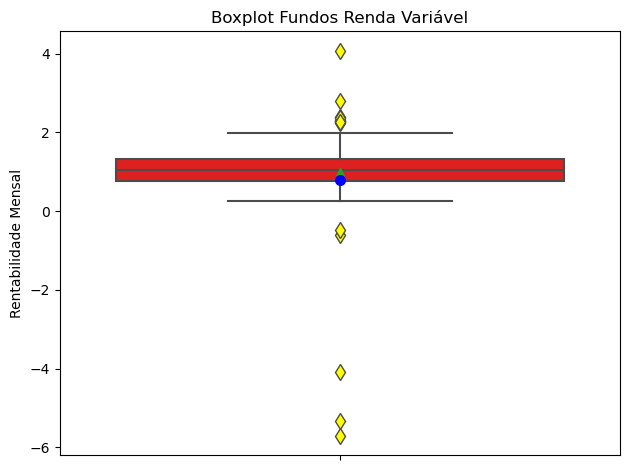

In [1379]:
boxplots('Renda Variável')

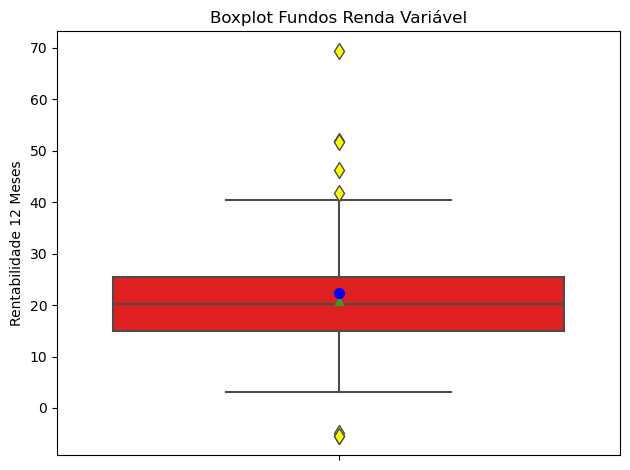

In [1380]:
boxplots12('Renda Variável')